In [1]:
import pandas as pd

In [ ]:
pip install scikit-learn

In [7]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Data Preparation

In [13]:
X = df.drop('booking_complete', axis=1)
y = df.booking_complete
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

### Feature Importance Analysis

In [18]:
from sklearn.feature_selection import mutual_info_classif

feautre_scores = mutual_info_classif(X, y)
feautre_scores = pd.Series(feautre_scores, name="Feautre Scores", index=X.columns)
feautre_scores = feautre_scores.sort_values(ascending=False)

feautre_scores

route                    0.054139
booking_origin           0.047648
flight_duration          0.012981
wants_extra_baggage      0.008823
length_of_stay           0.008368
wants_in_flight_meals    0.004729
num_passengers           0.003050
flight_day               0.002767
flight_hour              0.002366
sales_channel            0.001590
wants_preferred_seat     0.000443
purchase_lead            0.000000
trip_type                0.000000
Name: Feautre Scores, dtype: float64

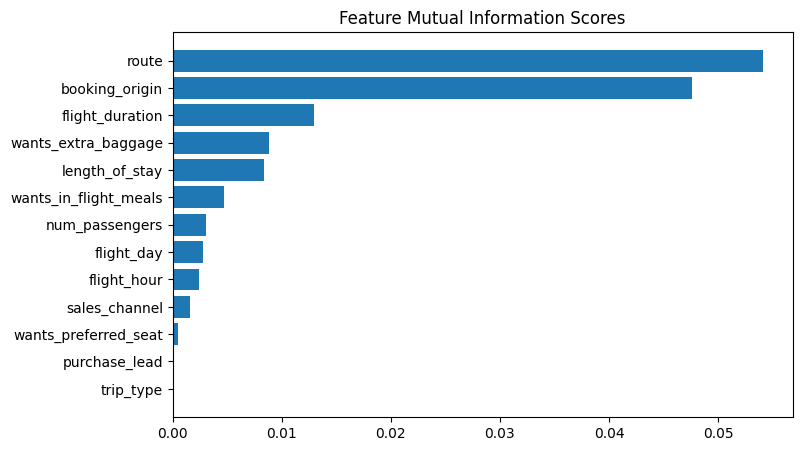

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Feature Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_feature_scores(feautre_scores)

### Model Training and Evaluation

In [34]:
from sklearn.model_selection import train_test_split

def split_dataset(features, target):
    
    X_train_full, X_val, y_train_full, y_val = train_test_split(features, target, test_size=0.2, random_state=0)
    
    return  X_val, X_train_full,y_val, y_train_full,

In [25]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return scaler.transform(X)

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete   


X_train_full, X_val, y_train_full, y_val = split_dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train_full, y_train_full)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.2775
AUC score:  0.5572510596618466


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score

preds = forest_model.predict(X_val)

accuracy = accuracy_score(y_val, preds) 
print('Accuracy: {:.2f}%'.format(accuracy * 100))

pred_probs = forest_model.predict_proba(X_val)[:, 1]  

auc_score = roc_auc_score(y_val, pred_probs)  
print('AUC Score: {:.2f}'.format(auc_score)) 

Accuracy: 83.28%
AUC Score: 0.71
